http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

### Week 11
### Abed Tabbalat
### DSC 530
### 11/12/2021

In [27]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import survival
import nsfg

## Exercise 13.1

In NSFG Cycles 6 and 7, the variable `cmdivorcx` contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [39]:
resp6 = survival.ReadFemResp2002()
resp7 = survival.ReadFemResp2010()

resp6 = resp6.dropna()
resp7 = resp7.dropna()

In [40]:
def CleanData(resp):
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp['notdivorced'] = resp.cmdivorcx.isnull().astype(int)
    resp['duration'] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp['durationsofar'] = (resp.cmintvw - resp.cmmarrhx) / 12.0

    month0 = pd.to_datetime('1899-12-15')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

In [41]:
CleanData(resp6)
married6 = resp6[resp6.evrmarry==1]

CleanData(resp7)
married7 = resp7[resp7.evrmarry==1]

In [42]:
def ResampleDivorceCurve(resps):
    for _ in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pandas.concat(samples, ignore_index=True)
        PlotDivorceCurveByDecade(sample, color='#225EA8', alpha=0.1)

    thinkplot.Show(xlabel='years',
                   axis=[0, 28, 0, 1])

In [48]:
def ResampleDivorceCurveByDecade(resps):
    for i in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')
        if i == 0:
            survival.AddLabelsByDecade(groups, alpha=0.7)

        EstimateSurvivalByDecade(groups, alpha=0.1)

    thinkplot.Config(root='survival7',
                   xlabel='years',
                   axis=[0, 28, 0, 1])

In [49]:
def EstimateSurvivalByDecade(groups, **options):
    thinkplot.PrePlot(len(groups))
    for name, group in groups:
        print(name, len(group))
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)

In [50]:
def EstimateSurvival(resp):
    complete = resp[resp.notdivorced == 0].duration
    ongoing = resp[resp.notdivorced == 1].durationsofar

    hf = survival.EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf


5 203
6 1366
7 863
8 132
5 187
6 1407
7 820
8 150
5 176
6 1385
7 840
8 163
5 226
6 1399
7 800
8 139
5 187
6 1410
7 823
8 144
5 182
6 1374
7 868
8 140
5 193
6 1411
7 814
8 146
5 196
6 1383
7 843
8 142
5 190
6 1406
7 839
8 129
5 170
6 1408
7 837
8 149
5 159
6 1402
7 845
8 158
5 186
6 1371
7 831
8 176
5 203
6 1405
7 828
8 128
5 167
6 1382
7 846
8 169
5 180
6 1435
7 793
8 156
5 199
6 1390
7 825
8 150
5 181
6 1407
7 837
8 139
5 210
6 1385
7 827
8 142
5 186
6 1385
7 844
8 149
5 202
6 1386
7 807
8 169
5 165
6 1411
7 822
8 166
5 191
6 1436
7 796
8 141
5 191
6 1398
7 830
8 145
5 206
6 1376
7 827
8 155
5 177
6 1337
7 905
8 145
5 188
6 1392
7 847
8 137
5 187
6 1370
7 858
8 149
5 178
6 1453
7 804
8 129
5 203
6 1406
7 807
8 148
5 209
6 1423
7 790
8 142
5 200
6 1354
7 861
8 149
5 201
6 1380
7 837
8 146
5 176
6 1426
7 816
8 146
5 196
6 1379
7 837
8 152
5 194
6 1394
7 829
8 147
5 189
6 1430
7 812
8 133
5 191
6 1379
7 834
8 160
5 197
6 1412
7 807
8 148
5 209
6 1411
7 808
8 136
5 186
6 1394
7 825
8 159


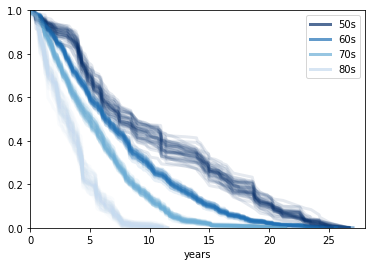

In [51]:
ResampleDivorceCurveByDecade([married6, married7])
